# Top Python Packages for Image Augmentation (Sample Codes)
- This notebook provides a set of sample codes for the basic implementation of image augmentation techniques across the most popular image processing Python libraries
- Link to Medium article: 
- Author: **Kenneth Leung**

### Contents
- [scikit-image](#skimage)  
- [Augmentor](#augmentor)  
- [Albumentations](#albumentations)  
- [Torchvision](#torchvision)  
- [imgaug](#imgaug)  
- [OpenCV](#opencv)
___

#### Import sample image

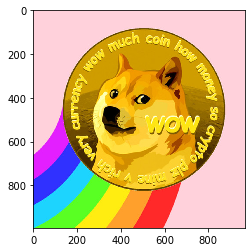

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

%matplotlib inline
sample_img = Image.open('assets/sample_images/sample_image_dogecoin.png', 'r')
sample_img = np.array(sample_img)
plt.imshow(sample_img);

"Lord Dogecoin of Future Finance" by Furtherfield is licensed with CC BY-NC 2.0. To view a copy of this license, visit https://creativecommons.org/licenses/by-nc/2.0/  
Source URL: https://search.creativecommons.org/photos/df298bc8-ea8d-4226-a8c9-dfe93fde0022

In [17]:
# Define function to show original and transformed image side by side
def show_both_images(original, transformed):
    fig, ax = plt.subplots(1,2)
    ax[0].axis('off')
    ax[1].axis('off')
    ax[0].set_title('Original')
    ax[1].set_title(f'Transformed')
    ax[0].imshow(original);
    ax[1].imshow(transformed);
    plt.show();

___
<a name="skimage"></a>
## scikit-image
- GitHub: https://github.com/scikit-image/scikit-image

In [ ]:
# Install scikit-image (Windows)
!pip install scikit-image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


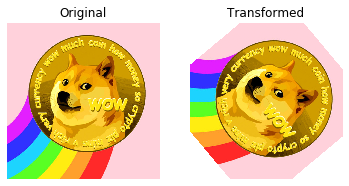

In [21]:
# Import scikit-image
from skimage import transform

# Perform 50 degrees clockwise rotation
transformed_img = transform.rotate(sample_img,
                                   angle=-50,
                                   cval=255 # Fill with white bg
                                  )

# Compare images
show_both_images(sample_img, transformed_img);

___
<a name="augmentor"></a>
## Augmentor
- GitHub Link: https://github.com/mdbloice/Augmentor

In [ ]:
# Install Augmentor
!pip install Augmentor

In [29]:
# Import Augmentor
import Augmentor

# Instantiate a Pipeline pointing to target input directory
p = Augmentor.Pipeline('./assets/sample_images/')

# Perform horizontal flip
p.flip_left_right(probability=1)

# We then sample (1 image) from the pipeline
num_of_samples = 1
p.sample(num_of_samples)

Executing Pipeline:   0%|                                                                  | 0/1 [00:00<?, ? Samples/s]

Initialised with 1 image(s) found.
Output directory set to ./assets/sample_images/output.

Processing <PIL.Image.Image image mode=RGB size=970x995 at 0x26FBA476340>: 100%|███| 1/1 [00:00<00:00,  4.63 Samples/s]


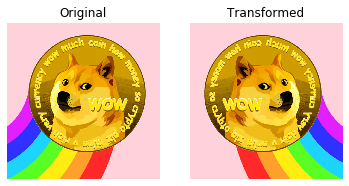

In [30]:
# Compare images
output_img_path = 'assets/sample_images/output/sample_img_output_augmentor.png'
transformed_img = Image.open(output_img_path, 'r')
show_both_images(sample_img, transformed_img);

___
<a name="albumentations"></a>
## Albumentations
- GitHub Link: https://github.com/albumentations-team/albumentations

In [ ]:
# Install albumentations
!pip install -U albumentations --user

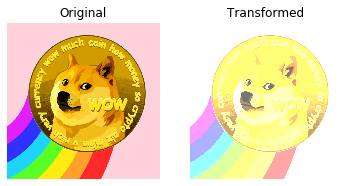

In [58]:
# Import albumentations
import albumentations as A

# Define augmentation pipeline
transform = A.Compose([
            A.RandomBrightnessContrast(p=1.0, brightness_limit=1)
            ])

# Run pipeline on original image
transformed = transform(image=sample_img)
transformed_img = transformed["image"]

# Compare images
show_both_images(sample_img, transformed_img);

___
<a name="torchvision"></a>
## Torchvision

In [ ]:
# Install torchvision
!pip install torchvision

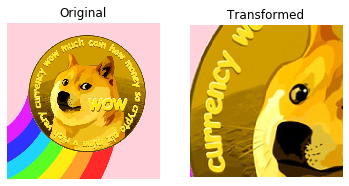

In [70]:
# Import torchvision transforms
import torchvision.transforms as T

# Define Compose transformation pipeline (with random crop)
transform = T.Compose([T.RandomCrop(size=320)
                      ])

# Set input as PIL Image format (instead of numpy_array)
sample_img_PIL = Image.open('assets/sample_images/sample_image_dogecoin.png')

# Run transformation pipeline on PIL image
transformed_img = transform(sample_img_PIL) 

# Compare images
show_both_images(sample_img, transformed_img);

___
<a name="imgaug"></a>
### imgaug

In [ ]:
# Install imgaug
!pip install imgaug

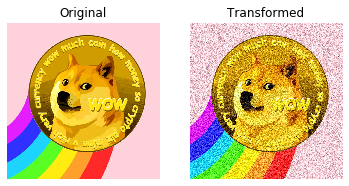

In [77]:
# Import imgaug
from imgaug import augmenters as iaa

# Define transformation (Sequential) pipeline for Gaussian noise
transform = iaa.Sequential([iaa.AdditiveGaussianNoise(scale=(20, 70))
                            ])

# Run transformation on sample image
transformed_img = transform(image=sample_img)

# Compare images
show_both_images(sample_img, transformed_img);

___
<a name="opencv"></a>
### OpenCV

In [ ]:
# Install OpenCV
!pip install opencv-python

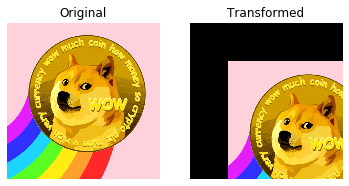

In [79]:
# Import OpenCV
import cv2

# Get height and width of the image
height, width = sample_img.shape[:2]

# Set translation parameters
quarter_height, quarter_width = height/4, width/4
  
translation_matrix = np.float32([[1, 0, quarter_width], 
                                 [0, 1, quarter_height]])
  
# Use of warpAffine to perform translation with matrix
transformed_img = cv2.warpAffine(sample_img, translation_matrix, 
                                 (width, height))

# Compare images
show_both_images(sample_img, transformed_img);